# Comebine & compare spatial datasets

In [9]:
import geopandas as gpd
from geodatasets import get_path

In [10]:
path_to_file = get_path('nybb')

Extracting 'nybb_16a/nybb.shp' from 'C:\Users\quay\AppData\Local\geodatasets\geodatasets\Cache\nybb_16a.zip' to 'C:\Users\quay\AppData\Local\geodatasets\geodatasets\Cache\nybb_16a.zip.unzip'
Extracting 'nybb_16a/nybb.shx' from 'C:\Users\quay\AppData\Local\geodatasets\geodatasets\Cache\nybb_16a.zip' to 'C:\Users\quay\AppData\Local\geodatasets\geodatasets\Cache\nybb_16a.zip.unzip'
Extracting 'nybb_16a/nybb.dbf' from 'C:\Users\quay\AppData\Local\geodatasets\geodatasets\Cache\nybb_16a.zip' to 'C:\Users\quay\AppData\Local\geodatasets\geodatasets\Cache\nybb_16a.zip.unzip'
Extracting 'nybb_16a/nybb.prj' from 'C:\Users\quay\AppData\Local\geodatasets\geodatasets\Cache\nybb_16a.zip' to 'C:\Users\quay\AppData\Local\geodatasets\geodatasets\Cache\nybb_16a.zip.unzip'


In [11]:
nybb = gpd.read_file(path_to_file)
nybb.head()

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


In [7]:
gdf = gpd.read_file('../data/2010 Neighborhood Tabulation Areas (NTAs).geojson')
gdf.head()

,ntacode,shape_area,county_fips,ntaname,shape_leng,boro_name,boro_code,geometry
0,QN08,77412747.7312,081,St. Albans,45401.3168869,Queens,4,"MULTIPOLYGON (((-73.75205 40.70523, -73.75174 ..."
1,BK50,82089678.5561,047,Canarsie,43703.6099368,Brooklyn,3,"MULTIPOLYGON (((-73.88834 40.64671, -73.88835 ..."
2,BX41,14716710.8951,005,Mount Hope,18937.2480742,Bronx,2,"MULTIPOLYGON (((-73.89561 40.85457, -73.89662 ..."
3,QN38,38835920.1944,081,Pomonok-Flushing Heights-Hillcrest,30731.4196253,Queens,4,"MULTIPOLYGON (((-73.7964 40.73828, -73.79639 4..."
4,QN52,29453683.8069,081,East Flushing,25848.5455105,Queens,4,"MULTIPOLYGON (((-73.79493 40.7578, -73.79475 4..."


Text(0.5, 1.0, 'Nyc neighbourhoods')

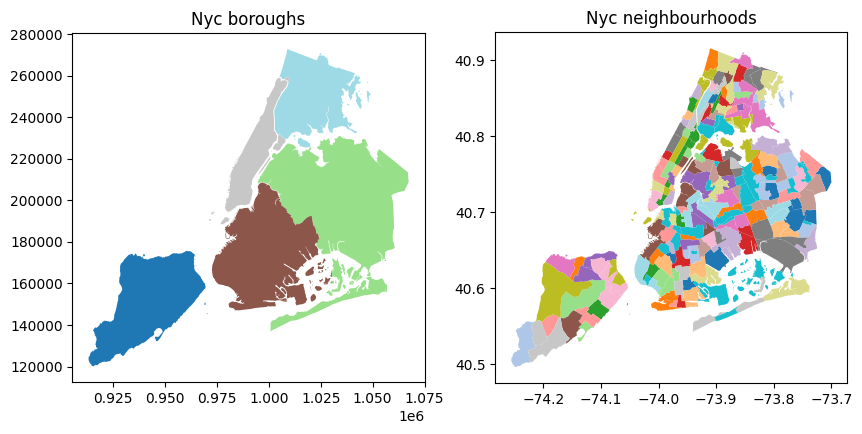

In [12]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, 2, figsize = (10, 5))
nybb.plot(ax=ax[0], cmap = 'tab20')
gdf.plot(ax=ax[1], cmap = 'tab20')

ax[0].set_title('Nyc boroughs')
ax[1].set_title('Nyc neighbourhoods')

In [13]:
print(nybb.crs)
print(gdf.crs)

EPSG:2263
EPSG:4326


In [14]:
gdf_local = gdf.to_crs(nybb.crs)

In [15]:
print(nybb.crs)
print(gdf_local.crs)

EPSG:2263
EPSG:2263


In [16]:
gdf_local.head(2)

,ntacode,shape_area,county_fips,ntaname,shape_leng,boro_name,boro_code,geometry
0,QN08,77412747.7312,081,St. Albans,45401.3168869,Queens,4,"MULTIPOLYGON (((1052996.114 196307.361, 105308..."
1,BK50,82089678.5561,047,Canarsie,43703.6099368,Brooklyn,3,"MULTIPOLYGON (((1015236.113 174910.103, 101523..."


In [17]:
nybb.head(2)

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."


In [18]:
df_groupby_1 = gdf_local.groupby(by = 'boro_name').count()[['geometry']].rename(columns = {'geometry': 'ngh_cnt_1'})
df_groupby_1

,ngh_cnt_1
boro_name,
Bronx,38
Brooklyn,51
Manhattan,29
Queens,58
Staten Island,19


In [19]:
gdf_over = gpd.overlay(nybb, gdf_local[['ntaname','geometry']])
gdf_over.head(2)

,BoroCode,BoroName,Shape_Leng,Shape_Area,ntaname,geometry
0,5,Staten Island,330470.010332,1.623820e+09,Charleston-Richmond Valley-Tottenville,"POLYGON ((922528.377 122455.996, 922528.29 122..."
1,5,Staten Island,330470.010332,1.623820e+09,Port Richmond,"MULTIPOLYGON (((944964.084 172610.981, 944984...."


In [31]:
df_group_2 = gdf_over.groupby(by = 'BoroName').count()
df_group_2 = df_group_2[['ntaname']].rename(columns = {'ntaname' : 'ngh_cnt_2'})
df_group_2

,ngh_cnt_2
BoroName,
Bronx,39
Brooklyn,62
Manhattan,36
Queens,65
Staten Island,20


In [32]:
df_group = df_groupby_1.merge(df_group_2, left_index = True, right_index= True)
df_group

,ngh_cnt_1,ngh_cnt_2
boro_name,,
Bronx,38,39
Brooklyn,51,62
Manhattan,29,36
Queens,58,65
Staten Island,19,20


In [33]:
df_group.corr()

,ngh_cnt_1,ngh_cnt_2
ngh_cnt_1,1.000000,0.984094
ngh_cnt_2,0.984094,1.000000


<Axes: >

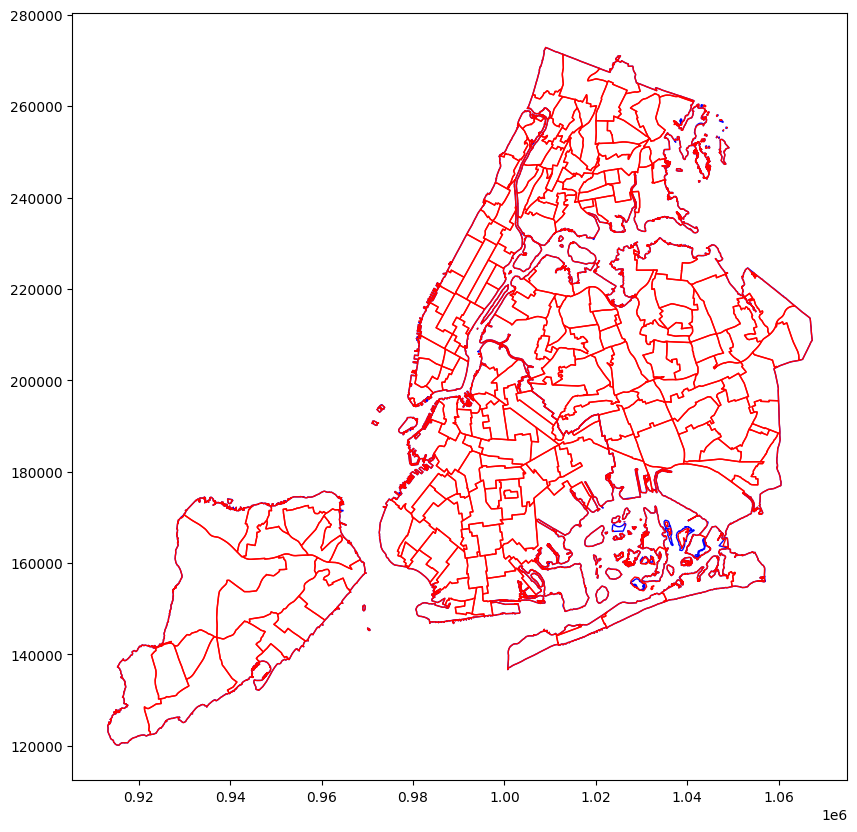

In [35]:
f, ax = plt.subplots(1, 1, figsize = (10,10))
nybb.plot(ax=ax, color = 'none', edgecolor = 'b')
gdf_local.plot(ax=ax, color = 'none', edgecolor = 'r')